In [1]:
#Daniel W. Anner
#DSSA 5104 - Deep Leraning
#Project 2 Voting Records

In [2]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
#load data 
dataset = pd.read_csv("votingrecords.csv", header = None)

#set random seed for reproducibility
np.random.seed(7)

#head the data 
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
2,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
3,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
4,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y


In [4]:
#data is y's and n's. NN needs 1's and 0's. We can use LabelEncoder()
data = dataset.apply(LabelEncoder().fit_transform) 

#convert dataframe to numpy array
df = data.values
print(df)

#show num of obs and vars 
print(df.shape)

[[0 0 1 ... 1 1 1]
 [1 0 1 ... 1 0 1]
 [0 1 1 ... 0 1 1]
 ...
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]
 [0 0 0 ... 0 0 1]]
(232, 17)


In [5]:
#can split into our X and Y Variables 
#X is our input
#Y is our output 
X = df[:,1:17]
Y = df[:,0]

In [6]:
#we want to look into how NN can be changed, so we are going to cap our epochs at 50 for all tests
#testing with something higher than 150 gives 100% accuracy or very close so we need a low epoch
#3 layers Relu Relu Sigmoid 12 8 1 NN
#reset vars 
model = None
history = None
y_predict = None
adam = None

#set epochs 
epochs = 50
#create NN model
model = Sequential()
model.add(Dense(12, input_dim = 16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#compile NN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#fit NN 50 with epochs 
history = model.fit(X,Y,epochs=epochs, verbose=0)

#evaluate NN
scores = model.evaluate(X, Y)

#predict NN 
y_predict = model.predict(X)

#print accuracy and loss 
accuracy = (model.metrics_names[1], scores[1]*100)[1]
loss = (model.metrics_names[0], scores[0]*100)[1]
print("\nAccuracy: %s" % accuracy)
print("\nLoss: %s" % loss)

8/8 [==============================] - 1s 3ms/step - loss: 0.1376 - accuracy: 0.9526

Accuracy: 95.25862336158752

Loss: 13.761183619499207


In [7]:
#confusion matrix details
rounded = [round(i[0]) for i in y_predict]
y_pred = np.array(rounded,dtype='int64')
print('----------------')
print('Confusion Matrix')
print('----------------')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',  CM[0,0])
print('False negatives: ', CM[1,0])
print('False positives: ', CM[0,1])
print('True positives: ',  CM[1,1])

----------------
Confusion Matrix
----------------
True negatives:  116
False negatives:  3
False positives:  8
True positives:  105


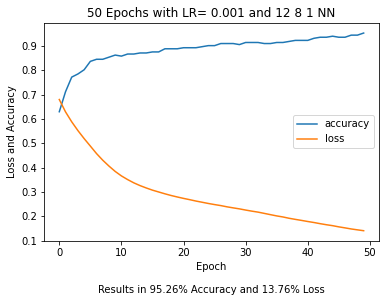

In [8]:
#plot loss and accuracy by epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('50 Epochs with LR= 0.001 and 12 8 1 NN')
plt.ylabel('Loss and Accuracy')
plt.xlabel('Epoch\n\nResults in %s%% Accuracy and %s%% Loss' % (round(accuracy, 2), round(loss, 2)))
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()

In [9]:
#3 layers RRS 20 7 1 NN
#reset vars 
model = None
history = None
y_predict = None
adam = None
#Create NN model
model = Sequential()
model.add(Dense(20, input_dim = 16, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#compile NN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#fit NN 50 with epochs 
history = model.fit(X,Y,epochs=epochs,verbose=0)

#evaluate NN
scores = model.evaluate(X, Y)

#predict NN 
y_predict = model.predict(X)

#print accuracy and loss 
accuracy = (model.metrics_names[1], scores[1]*100)[1]
loss = (model.metrics_names[0], scores[0]*100)[1]
print("\nAccuracy: %s" % accuracy)
print("\nLoss: %s" % loss)

8/8 [==============================] - 0s 4ms/step - loss: 0.0777 - accuracy: 0.9784

Accuracy: 97.84482717514038

Loss: 7.769554108381271


In [10]:
#confusion matrix details
rounded = [round(i[0]) for i in y_predict]
y_pred = np.array(rounded,dtype='int64')
print('----------------')
print('Confusion Matrix')
print('----------------')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',  CM[0,0])
print('False negatives: ', CM[1,0])
print('False positives: ', CM[0,1])
print('True positives: ',  CM[1,1])

----------------
Confusion Matrix
----------------
True negatives:  121
False negatives:  2
False positives:  3
True positives:  106


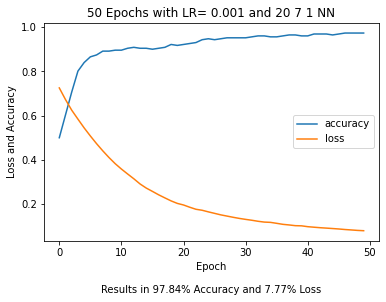

In [11]:
#plot loss and accuracy by epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('50 Epochs with LR= 0.001 and 20 7 1 NN')
plt.ylabel('Loss and Accuracy')
plt.xlabel('Epoch\n\nResults in %s%% Accuracy and %s%% Loss' % (round(accuracy, 2), round(loss, 2)))
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()

In [12]:
#4 layers RRRS 5 20 10 1 NN
#reset vars 
model = None
history = None
y_predict = None
adam = None
#create NN model
model = Sequential()
model.add(Dense(5, input_dim = 16, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#compile NN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#fit NN 50 with epochs 
history = model.fit(X,Y,epochs=epochs, verbose=0)

#evaluate NN
scores = model.evaluate(X, Y)

#predict NN 
y_predict = model.predict(X)

#print accuracy and loss 
print(epochs)
accuracy = (model.metrics_names[1], scores[1]*100)[1]
loss = (model.metrics_names[0], scores[0]*100)[1]
print("\nAccuracy: %s" % accuracy)
print("\nLoss: %s" % loss)

8/8 [==============================] - 0s 3ms/step - loss: 0.0933 - accuracy: 0.9741
50

Accuracy: 97.41379022598267

Loss: 9.330306947231293


In [13]:
#confusion matrix details
rounded = [round(i[0]) for i in y_predict]
y_pred = np.array(rounded,dtype='int64')
print('----------------')
print('Confusion Matrix')
print('----------------')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',  CM[0,0])
print('False negatives: ', CM[1,0])
print('False positives: ', CM[0,1])
print('True positives: ',  CM[1,1])

----------------
Confusion Matrix
----------------
True negatives:  120
False negatives:  2
False positives:  4
True positives:  106


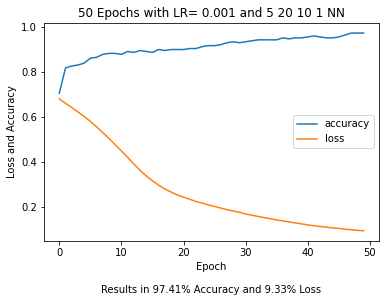

In [14]:
#plot loss and accuracy by epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('50 Epochs with LR= 0.001 and 5 20 10 1 NN')
plt.ylabel('Loss and Accuracy')
plt.xlabel('Epoch\n\nResults in %s%% Accuracy and %s%% Loss' % (round(accuracy, 2), round(loss, 2)))
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()

In [15]:
#5 layers RSSS 5 4 3 2 1 NN
#reset vars 
model = None
history = None
y_predict = None
adam = None
#create NN Model
model = Sequential()
model.add(Dense(5, input_dim = 16, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))



adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#compile NN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#fit NN 50 with epochs 
history = model.fit(X,Y,epochs=epochs, verbose=0)
#evaluate NN
scores = model.evaluate(X, Y)
#predict NN 
y_predict = model.predict(X)
#print accuracy and loss 
print(epochs)
accuracy = (model.metrics_names[1], scores[1]*100)[1]
loss = (model.metrics_names[0], scores[0]*100)[1]
print("\nAccuracy: %s" % accuracy)
print("\nLoss: %s" % loss)

8/8 [==============================] - 1s 5ms/step - loss: 0.6904 - accuracy: 0.5345
50

Accuracy: 53.448277711868286

Loss: 69.03713345527649


In [16]:
#confusion matrix details
rounded = [round(i[0]) for i in y_predict]
y_pred = np.array(rounded,dtype='int64')
print('----------------')
print('Confusion Matrix')
print('----------------')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',  CM[0,0])
print('False negatives: ', CM[1,0])
print('False positives: ', CM[0,1])
print('True positives: ',  CM[1,1])

----------------
Confusion Matrix
----------------
True negatives:  124
False negatives:  108
False positives:  0
True positives:  0


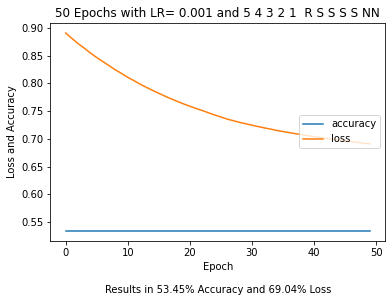

In [17]:
#plot loss and accuracy by epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('50 Epochs with LR= 0.001 and 5 4 3 2 1  R S S S S NN')
plt.ylabel('Loss and Accuracy')
plt.xlabel('Epoch\n\nResults in %s%% Accuracy and %s%% Loss' % (round(accuracy, 2), round(loss, 2)))
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()

In [18]:
#10 Layers 
#reset vars 
model = None
history = None
y_predict = None
adam = None
#create NN Model
model = Sequential()
model.add(Dense(8, input_dim = 16, activation='relu'))
model.add(Dense(7, activation='sigmoid'))
model.add(Dense(10, activation='relu'))
model.add(Dense(9, activation='sigmoid'))
model.add(Dense(4, activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(12, activation='relu'))
model.add(Dense(9, activation='sigmoid'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#compile NN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#fit NN 50 with epochs 
history = model.fit(X,Y,epochs=epochs, verbose=0)

#evaluate NN
scores = model.evaluate(X, Y)

#predict NN 
y_predict = model.predict(X)

#print accuracy and loss 
print(epochs)
accuracy = (model.metrics_names[1], scores[1]*100)[1]
loss = (model.metrics_names[0], scores[0]*100)[1]
print("\nAccuracy: %s" % accuracy)
print("\nLoss: %s" % loss)

8/8 [==============================] - 1s 5ms/step - loss: 0.6912 - accuracy: 0.5345
50

Accuracy: 53.448277711868286

Loss: 69.12264227867126


In [19]:
#confusion matrix details
rounded = [round(i[0]) for i in y_predict]
y_pred = np.array(rounded,dtype='int64')
print('----------------')
print('Confusion Matrix')
print('----------------')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',  CM[0,0])
print('False negatives: ', CM[1,0])
print('False positives: ', CM[0,1])
print('True positives: ',  CM[1,1])

----------------
Confusion Matrix
----------------
True negatives:  124
False negatives:  108
False positives:  0
True positives:  0


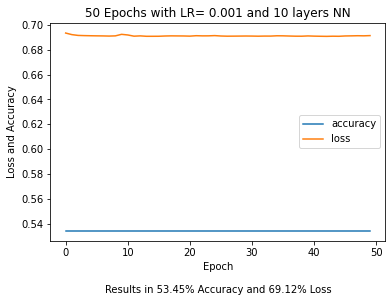

In [20]:
#plot loss and accuracy by epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('50 Epochs with LR= 0.001 and 10 layers NN')
plt.ylabel('Loss and Accuracy')
plt.xlabel('Epoch\n\nResults in %s%% Accuracy and %s%% Loss' % (round(accuracy, 2), round(loss, 2)))
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()